### Import the libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_predict as cvp

### Load the data

In [2]:
train_data= pd.read_csv("C:\\Users\\hp\\Downloads\\train.csv")
test_data= pd.read_csv("C:\\Users\\hp\\Downloads\\test.csv")

In [48]:
train_data.head()

,Id,target,1,2,3,4,5,6,7
0,0,5.85,4.80,5.85,NaN,NaN,NaN,NaN,NaN
1,3,4.28,5.88,6.84,NaN,NaN,NaN,NaN,NaN
2,4,3.97,3.20,2.70,NaN,NaN,NaN,NaN,NaN
3,5,5.95,7.70,7.06,NaN,NaN,NaN,NaN,NaN
4,6,4.70,5.50,5.30,NaN,NaN,NaN,NaN,NaN


### Find Info for understanding the columns like how many columns and what type of value in it

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


### Describe for understanding data columns like min,max, mean, std .

In [50]:
train_data.describe()

,Id,target,1,2,3,4,5,6,7
count,147.000000,147.000000,145.000000,145.000000,32.000000,31.000000,33.000000,37.000000,37.000000
mean,101.401361,5.021633,4.972621,4.906552,4.665000,5.871613,8.678788,3.883784,3.957568
std,64.836640,2.122535,2.044076,2.001357,2.057429,2.555247,5.299119,1.615455,1.916953
min,0.000000,1.300000,0.900000,1.040000,2.040000,2.480000,2.880000,1.000000,1.600000
25%,41.500000,3.720000,3.500000,3.400000,3.325000,4.445000,5.840000,2.900000,2.900000
50%,102.000000,4.600000,4.800000,4.830000,4.150000,5.500000,7.300000,3.400000,3.500000
75%,158.500000,6.275000,6.450000,6.200000,5.970000,6.400000,8.420000,4.800000,4.400000
max,214.000000,11.700000,10.900000,11.000000,10.660000,14.790000,27.120000,8.540000,10.370000


### Find null values in data

In [51]:
train_data.isnull()

,Id,target,1,2,3,4,5,6,7
0,False,False,False,False,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
142,False,False,False,False,True,True,True,True,True
143,False,False,False,False,True,True,True,True,True
144,False,False,False,False,True,True,True,True,True
145,False,False,False,False,True,True,True,True,True


### Create heatmap for understanding the correlation in different columns

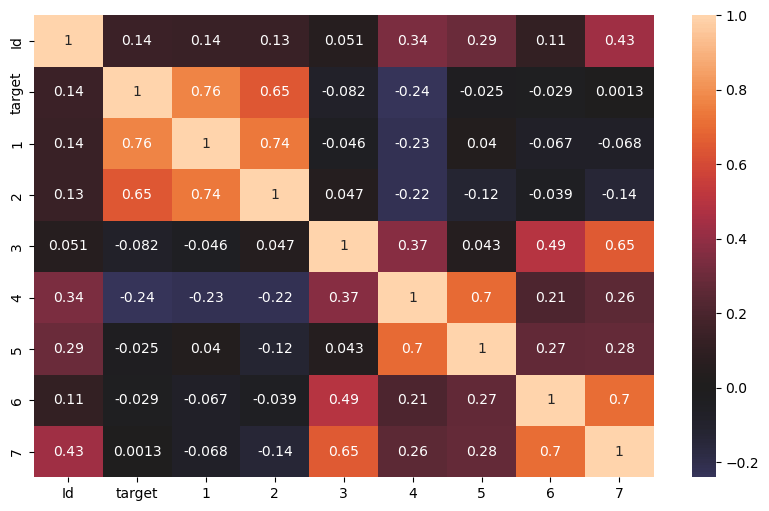

In [10]:
plt.figure(figsize= (10,6))
sns.heatmap(train_data.corr(),center=0, annot=True)
plt.show()

### Count the data how much value in particular columns

In [13]:
train_data.count()

Id        147
target    147
1         145
2         145
3          32
4          31
5          33
6          37
7          37
dtype: int64

### Drop unimportant features because those columns have so much null values( Approx 50 to 60%)

In [3]:
train_data = train_data.drop(['3','4','5','6','7','Id'],axis=1)

### Drop rows beacause it has null values and create a new dataframe with three columns

In [4]:
train_data=train_data.dropna()
train_data.head()

,target,1,2
0,5.85,4.80,5.85
1,4.28,5.88,6.84
2,3.97,3.20,2.70
3,5.95,7.70,7.06
4,4.70,5.50,5.30


In [54]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 146
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  144 non-null    float64
 1   1       144 non-null    float64
 2   2       144 non-null    float64
dtypes: float64(3)
memory usage: 4.5 KB


In [7]:
Y= train_data['target']
X= train_data.drop(['target'],axis=1)

### Use scaling method to convert value in one format

In [8]:
sc= StandardScaler()
train_data= pd.DataFrame(sc.fit_transform(X))

In [9]:
train_data.head()

,0,1
0,-0.085038,0.464653
1,0.443331,0.963267
2,-0.867807,-1.121847
3,1.333732,1.074070
4,0.257424,0.187645


### Split the data into trainand test dataset

  It is extremely important to split the data into train and test sets. Train set is used to train the model and Test set is used to test the performance of the model. 
  
  Problems encountered if train test split not performed:

It does not make sense to talk about the performance of the model by testing it on same data. The model learns the data pretty well and when tested on same data will produce the best score.
The model becomes very specific to the training data, so far as they even get trained on the ocassional erroneous labels present in the training data. This results in Overfitting and the model might not work well outside the training data.
Therefore it is advised to keep a certian portion of the data aside (test set) untouched and test our model on this data to evaluate the true performance of the model.

X_train - all the predictors

Y_train - target variable 

X_test - all the predictors

Y_test - target variable 


Let's define X and Y before splitting the data

In [10]:
X_train, X_test, Y_train, Y_test= train_test_split(train_data,Y, test_size=0.3, random_state=0)

In [11]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('Y_train: ',Y_train.shape)
print('Y_test: ',Y_test.shape)

X_train:  (100, 2)
X_test:  (44, 2)
Y_train:  (100,)
Y_test:  (44,)


### Use first algorithm it is linear regression for create a model

In [12]:
re= LinearRegression()
re.fit(X_train,Y_train)

LinearRegression()

In [15]:
Y_pred= re.predict(X_test)

In [16]:
from sklearn import metrics

### Find MSE and MAE ,RMSE that help to underastand how much currectly predict the data.

In [17]:
print("MSE",metrics.mean_squared_error(Y_test,Y_pred))

print("MAE", metrics.mean_absolute_error(Y_test,Y_pred))

MSE 1.908080391348191
MAE 0.9991164787350244


In [18]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
rmse

1.3813328314885558

### Second algorithm that is DecisionTreeRegressor and create a model

In [19]:
Reg = DecisionTreeRegressor()
Reg.fit(X_train,Y_train)

DecisionTreeRegressor()

In [20]:
Y_pred1= Reg.predict(X_test)
Y_pred1

array([3.74, 2.  , 3.74, 5.65, 5.85, 7.9 , 1.8 , 4.7 , 4.2 , 4.6 , 3.12,
       4.42, 1.8 , 5.6 , 8.  , 5.65, 7.4 , 3.96, 5.7 , 4.6 , 3.17, 3.74,
       2.3 , 9.2 , 5.7 , 6.4 , 4.6 , 6.8 , 5.4 , 4.7 , 5.75, 3.35, 7.4 ,
       3.3 , 9.2 , 5.9 , 8.2 , 4.42, 5.7 , 3.17, 5.9 , 7.4 , 4.2 , 4.55])

In [21]:
print("MAE1",metrics.mean_absolute_error(Y_test,Y_pred1))

print("MSE",metrics.mean_squared_error(Y_test,Y_pred1))

MAE1 1.281590909090909
MSE 2.729015909090909


In [22]:
rmse1= np.sqrt(metrics.mean_squared_error(Y_test,Y_pred1))
print(rmse1)

1.6519733378874215


### Third algorithm RandomForestRegressor for create a model

In [64]:
reg= RandomForestRegressor(n_estimators=1000, random_state=42)

reg.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [24]:
Y_pred2 = reg.predict(X_test)
Y_pred2

array([3.69641, 2.35972, 4.04768, 6.0223 , 5.4004 , 8.7563 , 1.99432,
       5.22535, 4.74895, 4.75757, 4.15568, 3.77217, 2.06114, 4.00642,
       7.13588, 5.68314, 6.1878 , 3.1258 , 4.786  , 3.95269, 3.21925,
       3.7377 , 2.74973, 7.5968 , 4.40332, 6.94121, 5.06289, 7.24345,
       6.49805, 4.75987, 5.37251, 3.3139 , 6.49554, 3.41049, 8.3107 ,
       5.88345, 5.48343, 3.67446, 4.57031, 3.88838, 5.29449, 7.11214,
       4.71175, 5.64416])

In [25]:
rmse2= np.sqrt(metrics.mean_squared_error(Y_test,Y_pred2))
print(rmse2)

1.5083133345170154


In [26]:
print("MAE2",metrics.mean_absolute_error(Y_test,Y_pred2))

print("MSE2",metrics.mean_squared_error(Y_test,Y_pred2))

MAE2 1.1259331818181826
MSE2 2.275009115081838


### FInd accuracy for three model like Linear Regression, Decision Tree Regressor and Random Forest Regressor

Ist Step: find error between Y_pred and Y_test

IInd Step: find mape for every model

IIIrd Step: Find accuracy for find which model gives much more closer value to actual value

In [27]:
error1= abs(Y_pred-Y_test)
error1

7      3.864581
91     2.778615
100    0.691662
26     0.987069
113    4.018449
131    1.620100
61     0.695663
22     0.997870
132    0.461905
16     0.269920
129    1.345180
123    0.033403
40     0.654918
45     0.012537
55     1.864446
33     1.937481
24     1.055904
8      0.132185
130    0.364389
52     0.096559
88     2.303701
119    0.155582
37     2.530782
99     0.038741
43     0.652951
117    0.183214
65     0.667670
143    1.946564
104    1.702090
18     0.129546
73     0.597297
27     0.556716
144    0.598830
2      0.689670
62     1.917637
10     0.345693
78     0.661918
108    0.555688
58     0.414527
111    1.276197
63     0.379653
44     0.335252
68     0.516840
115    0.921531
Name: target, dtype: float64

In [28]:
error2= abs(Y_pred1-Y_test)
error2.head()

7      3.96
91     2.25
100    0.34
26     1.45
113    3.15
Name: target, dtype: float64

In [29]:
error3= abs(Y_pred2-Y_test)
error3.head()

7      4.00359
91     1.89028
100    0.64768
26     1.07770
113    3.59960
Name: target, dtype: float64

In [30]:
mape1=100*(error1/Y_test)
mape2=100*(error2/Y_test)
mape3=100*(error3/Y_test)
mape1.head() 
mape2.head()
mape3.head()

7      51.994675
91     44.477176
100    19.049412
26     15.178873
113    39.995556
Name: target, dtype: float64

In [31]:
acc1= 100-np.mean(mape1)
acc1

81.11187083865273

In [53]:
acc2 =100-np.mean(mape2)
acc2

76.24598324917807

In [32]:
acc3 = 100-np.mean(mape3)
acc3

79.72731924964913

### Fourth algorithm that is Extra Tree Regressor

In [67]:
etr = ExtraTreesRegressor()
etr.fit(X_train, Y_train)

ExtraTreesRegressor()

In [34]:
Y_Pred3= etr.predict(X_test)

In [35]:
rmse3 = np.sqrt(metrics.mean_squared_error(Y_test,Y_Pred3))
print(rmse3)

1.6677760538159248


In [36]:
error4= abs(Y_Pred3-Y_test)
error4.head()

7      4.0755
91     2.2610
100    0.6768
26     1.1187
113    3.5894
Name: target, dtype: float64

In [37]:
mape4=100*(error4/Y_test)

In [38]:
acc4= 100-np.mean(mape4)
acc4

78.3903083485825

In [22]:
from xgboost import XGBRegressor

In [23]:
xgb_reg= XGBRegressor()
xgb_reg.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
Y_pred5= xgb_reg.predict(X_test)
Y_pred5

array([3.1000638, 2.0202532, 3.934603 , 6.082461 , 5.741329 , 8.479428 ,
       1.8919207, 4.911784 , 5.511828 , 5.0558987, 4.1293035, 3.5101824,
       1.8399107, 4.4886084, 8.836549 , 5.6477222, 5.088474 , 4.360249 ,
       5.0926237, 3.5746412, 3.3263586, 3.564568 , 2.02332  , 7.531992 ,
       5.1158857, 7.4351707, 4.534392 , 7.6810503, 5.15817  , 4.7454615,
       5.7502637, 4.002088 , 5.088474 , 3.2784328, 8.195635 , 6.4850106,
       4.5512295, 3.809296 , 5.190139 , 3.9827178, 5.2583747, 7.6501703,
       5.511828 , 6.91598  ], dtype=float32)

In [42]:
rmse4= np.sqrt(metrics.mean_squared_error(Y_test,Y_pred5))
print(rmse4)

1.8596709744010336


In [43]:
error5= abs(Y_pred5-Y_test)
mape5=100*(error5/Y_test)

In [44]:
acc5= 100-np.mean(mape5)
acc5

74.30866871281303

In [45]:
print("MSE3",metrics.mean_squared_error(Y_test,Y_pred5))

MSE3 3.45837613302969


### Create new data frame for showing the visualization on accuracy

In [54]:
data=[["LinearRegression",acc1],["DecisionTreeRegressor",acc2],["RandomForestRegressor",acc3],["ExtraTreeRegressor",acc4], ["XGBRegressor",acc5]]
df= pd.DataFrame(data, columns=['Algorithm','Accuracy'])
df

,Algorithm,Accuracy
0,LinearRegression,81.111871
1,DecisionTreeRegressor,76.245983
2,RandomForestRegressor,79.727319
3,ExtraTreeRegressor,78.390308
4,XGBRegressor,74.308669


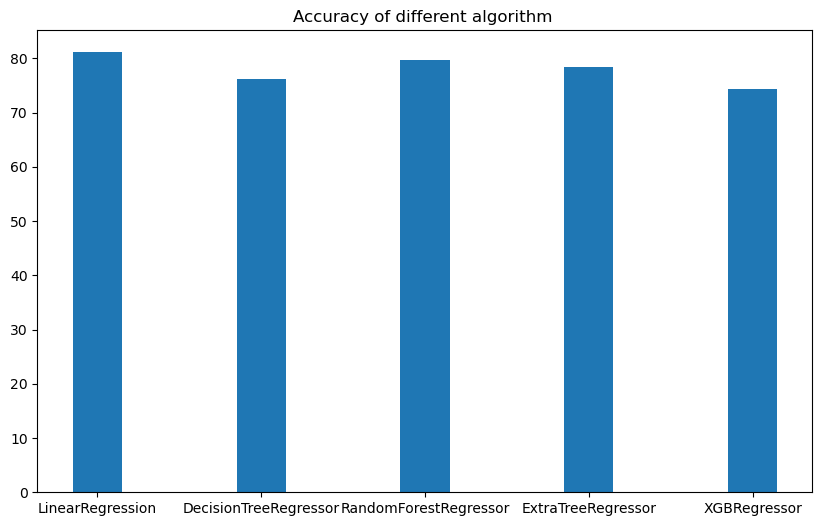

In [56]:
fig = plt.figure(figsize=(10,6))

plt.bar(df.Algorithm,df.Accuracy, width=0.3)

plt.title("Accuracy of different algorithm ")
plt.show()

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       15 non-null     float64
 4   4       15 non-null     float64
 5   5       16 non-null     float64
 6   6       14 non-null     float64
 7   7       14 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [6]:
test_data= test_data.drop(['Id','3','4','5','6','7'],axis=1)
test_data.head()

,1,2
0,6.80,5.40
1,4.71,4.20
2,2.10,3.40
3,5.35,5.85
4,4.80,5.30


In [14]:
Scaler= StandardScaler()
test_data= pd.DataFrame(Scaler.fit_transform(test_data), columns= test_data.columns)

In [62]:
xgb_reg.fit(train_data,Y)
xgb_reg.predict(X_train)[:3]

array([3.601099, 6.989933, 6.910082], dtype=float32)

In [65]:
reg.fit(train_data,Y)
reg.predict(X_train)[:3]

array([3.59853, 7.14851, 6.64207])

In [68]:
etr.fit(train_data,Y)
etr.predict(X_train)[:3]

array([3.6 , 6.98, 6.9 ])

### Plot the graph for Actual vs Predicted Values 

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

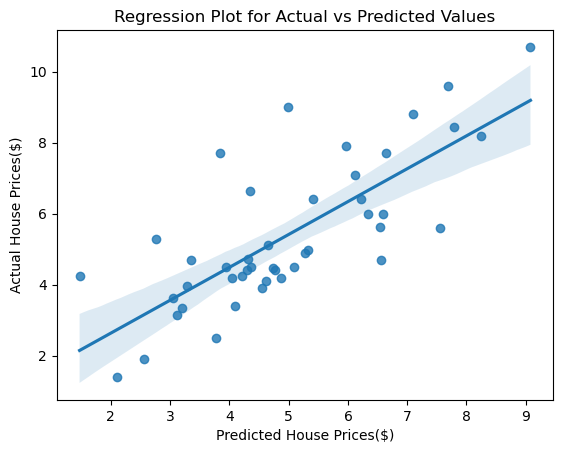

In [13]:
g = sns.regplot(x=re.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')